# Task 5: Exploratory Business Analytics
* Aim: To perform exploratory data analytics on 'SampleSuperstore' dataset to find out weaker areas of business to boost profits
* Programming Language used: Python 3
* Dataset: https://bit.ly/3i4rbWl

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Reading dataset into dataframe for Analysis

In [2]:
path = "C:/Users/Dhairya/Downloads/SampleSuperstore.csv"
sample_ss = pd.read_csv(path)

In [3]:
sample_ss.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
sample_ss.shape

(9994, 13)

### Check for missing data (e.g. NaN)

In [5]:
sample_ss.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Check for duplicates and drop them

In [6]:
sample_ss.duplicated().sum()

17

In [12]:
sample_ss = sample_ss.drop_duplicates()

In [13]:
sample_ss.shape

(9977, 13)

In [14]:
sample_ss.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Exploring dataset information

In [15]:
sample_ss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [16]:
sample_ss.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


###  Removing variables like postal code and country as it is not needed

In [17]:
super_store = sample_ss.drop(['Postal Code'], axis=1)
super_store = super_store.drop(['Country'], axis=1)

In [19]:
super_store.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Analysing the correlations among variables

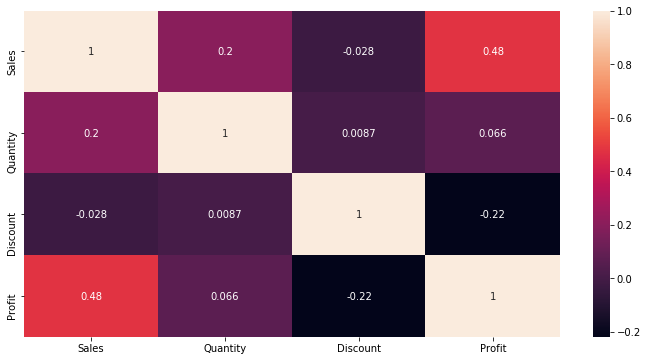

In [27]:
corrl = super_store.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corrl, annot = True)
plt.show()

### Data Visualization
Exploring the distribution of the 'sub-category' pertaining to 'category'

In [30]:
super_store['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

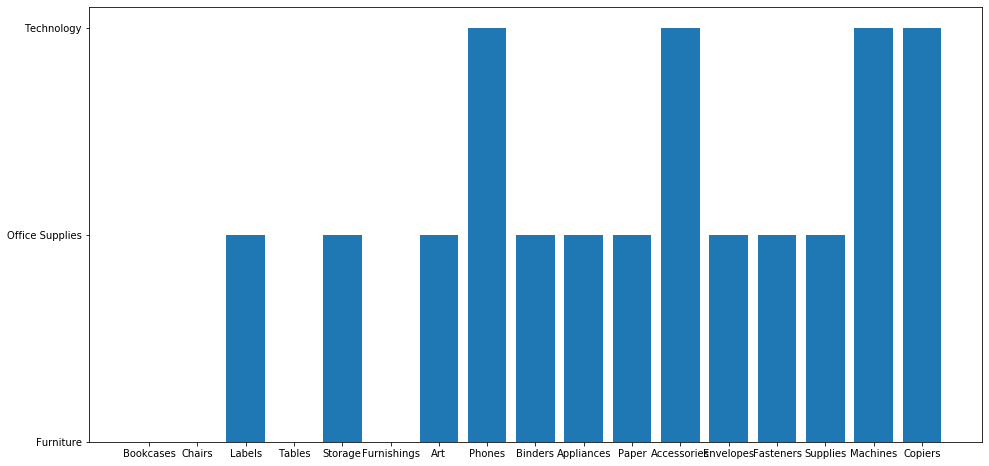

In [29]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category', 'Category', data=super_store)
plt.show()

# More Visuals of individual labels

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64


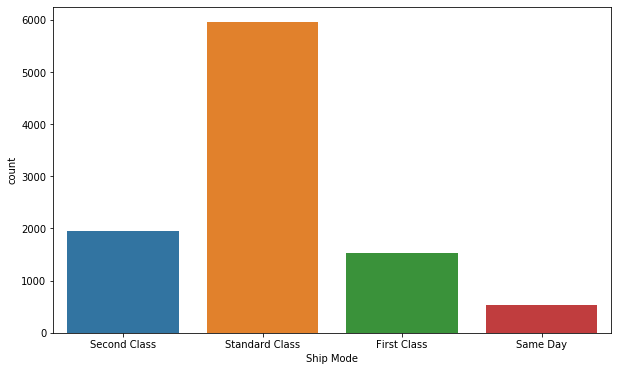

In [41]:
print (super_store['Ship Mode'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x=super_store['Ship Mode'])
plt.show()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64


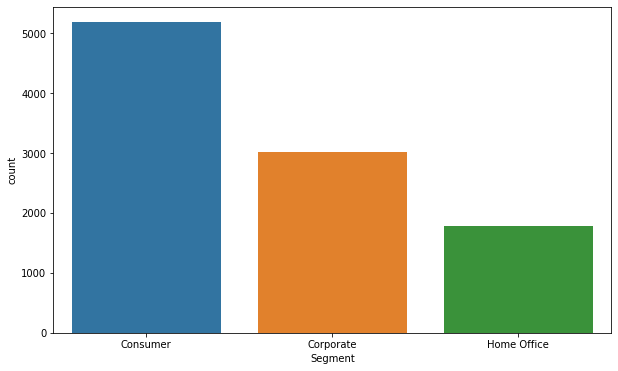

In [32]:
print (super_store['Segment'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x=super_store['Segment'])
plt.show()

New York City      914
Los Angeles        746
Philadelphia       536
San Francisco      506
Seattle            424
                  ... 
Linden               1
Pensacola            1
Springdale           1
San Luis Obispo      1
Margate              1
Name: City, Length: 531, dtype: int64


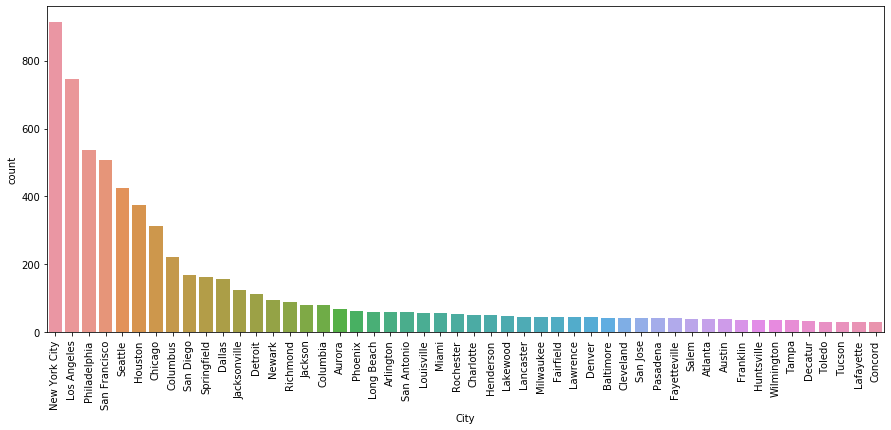

In [33]:
print (super_store['City'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(x=super_store['City'], order=(super_store['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)
plt.show()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

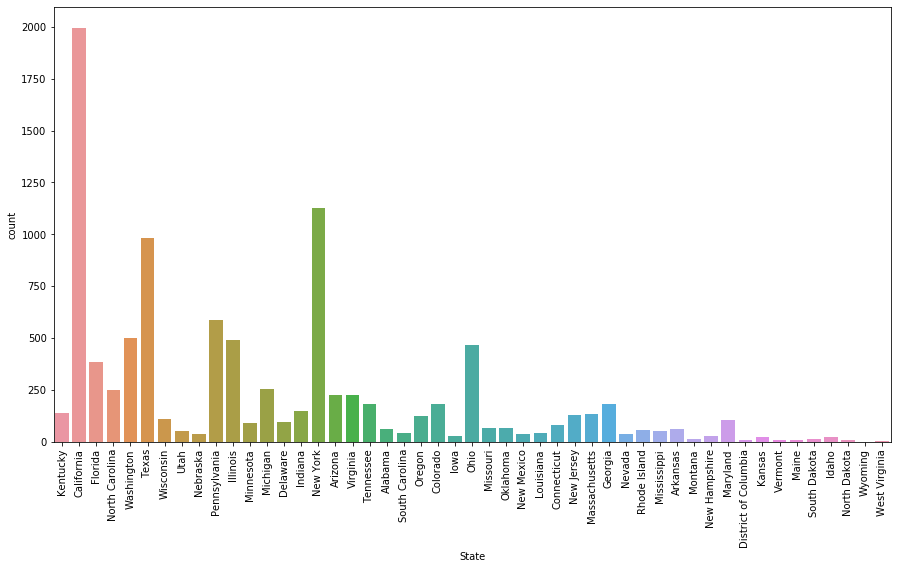

In [34]:
print (super_store['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=super_store['State'])
plt.xticks(rotation=90)
plt.show()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64


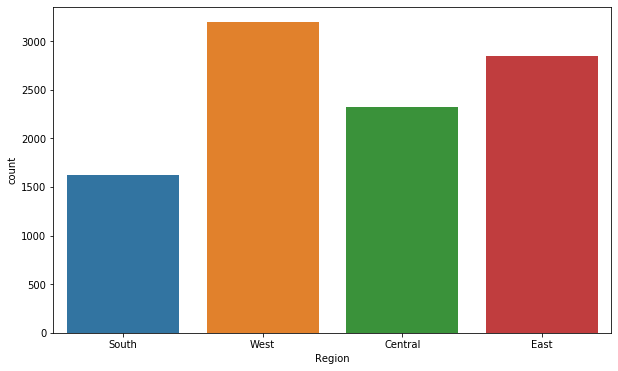

In [40]:
print (super_store['Region'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x=super_store['Region'])
plt.show()

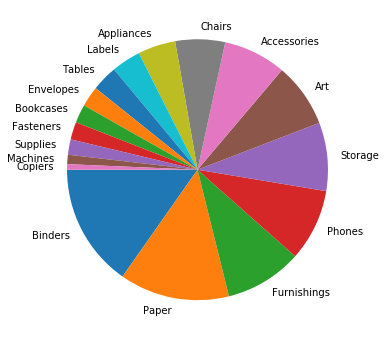

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


In [39]:
plt.figure(figsize=(12,6))
plt.pie(super_store['Sub-Category'].value_counts(), labels=super_store['Sub-Category'].value_counts().index, startangle=180, radius=1)
plt.show()
print (super_store['Sub-Category'].value_counts())

### Analysis of Subcategory wrt Profits

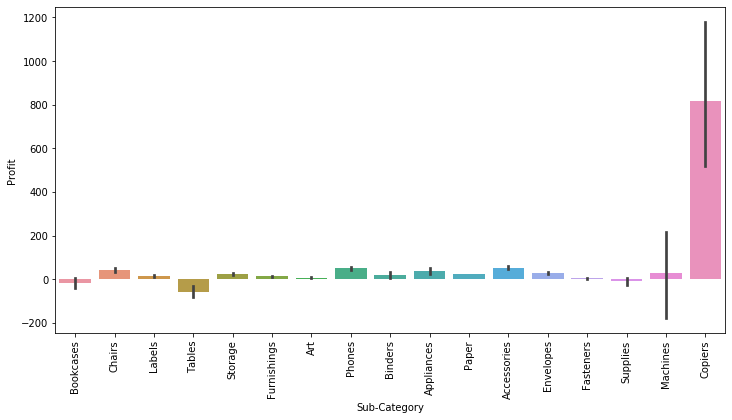

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x=super_store['Sub-Category'], y=super_store['Profit'])
plt.xticks(rotation=90)
plt.show()

### Exploratory Analysis from visualizations given above
The following insights should be looked into for a more profitable operation:
* Furniture and Technology sales need to be improved
* All sub-categories but Copiers are weak in profit making and should be improved
* Tables sales operations should be reduced drastically or stopped; being the only sub-category with no profit but loss
* Number of people working as Copiers should be increased for more products and sales and hence profit
* Supplies to the south region should be improved upon